# Lesson 5: Vacation planning using CSV files

In this lesson you'll learn to read in and work with data stored in CSV format. Data of this type looks like a table with rows and columns, and is referred to by programmers as **structured data**.

As always, begin by loading the helper functions you'll use:

In [1]:
# Imports
from helper_functions import get_llm_response, print_llm_response, display_table
from IPython.display import Markdown
import csv

Note that `import csv` here is new. Don't worry about the details for now, but this line of code will be used later to read in CSV data. You'll learn more about this code in Course 4.

## Loading data from a CSV file

You'll use the file ```itinerary.csv```, which has information about arrival and departure dates for each destination in a trip around the world.

Here is the code to load the file - the first part is the same as you've been using up to this point:

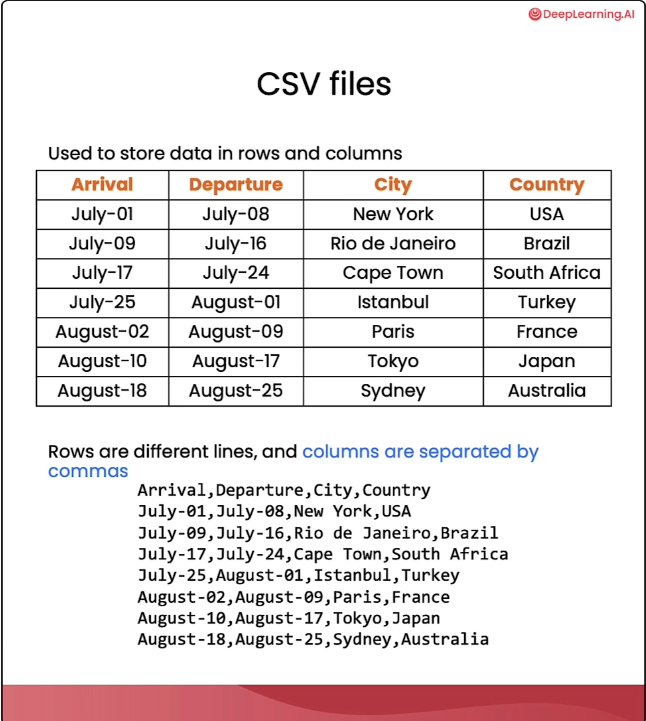

In [2]:
f = open("itinerary.csv", 'r')

The next part, where you read the data in from the file, is different because you are now reading in a CSV file:

In [3]:
# Load the data into the itinerary variable
csv_reader = csv.DictReader(f)
itinerary = []
for row in csv_reader:
    print(row)
    itinerary.append(row)
    
#It's loading "itenary.csv" one row at a time and saving it in this itinerary variable

{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}
{'Arrival': 'July-09', 'Departure': 'July-16', 'City': 'Rio de Janeiro', 'Country': 'Brazil'}
{'Arrival': 'July-17', 'Departure': 'July-24', 'City': 'Cape Town', 'Country': 'South Africa'}
{'Arrival': 'July-25', 'Departure': 'August-01', 'City': 'Istanbul', 'Country': 'Turkey'}
{'Arrival': 'August-02', 'Departure': 'August-09', 'City': 'Paris', 'Country': 'France'}
{'Arrival': 'August-10', 'Departure': 'August-17', 'City': 'Tokyo', 'Country': 'Japan'}
{'Arrival': 'August-18', 'Departure': 'August-25', 'City': 'Sydney', 'Country': 'Australia'}


Now close the file:

In [4]:
f.close()

You can print the itinerary to view it's content and use the `type` function to check the datatype:

In [5]:
print(itinerary)

[{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}, {'Arrival': 'July-09', 'Departure': 'July-16', 'City': 'Rio de Janeiro', 'Country': 'Brazil'}, {'Arrival': 'July-17', 'Departure': 'July-24', 'City': 'Cape Town', 'Country': 'South Africa'}, {'Arrival': 'July-25', 'Departure': 'August-01', 'City': 'Istanbul', 'Country': 'Turkey'}, {'Arrival': 'August-02', 'Departure': 'August-09', 'City': 'Paris', 'Country': 'France'}, {'Arrival': 'August-10', 'Departure': 'August-17', 'City': 'Tokyo', 'Country': 'Japan'}, {'Arrival': 'August-18', 'Departure': 'August-25', 'City': 'Sydney', 'Country': 'Australia'}]


In [6]:
type(itinerary)

list

Now take a look at the first item
* Remember the first item in a list has index 0

In [7]:
# Print item 0 
print(itinerary[0])

{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}


This is a dictionary. You can access a particular value by passing in the key - let's look at the `Country` value in the first row of the itinerary:

In [8]:
print(itinerary[0]["Country"])

USA


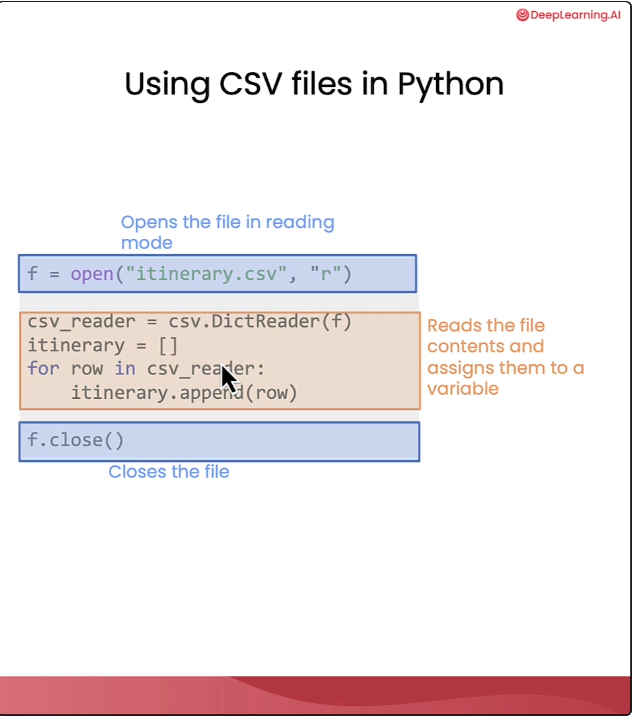

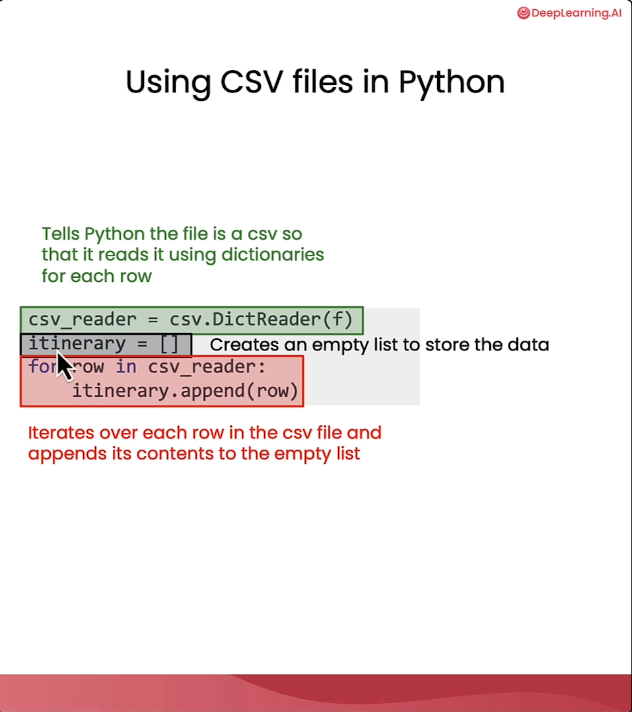

## Try for yourself!

Pause the video and explore other rows in the itinerary list, or individual items in any destination. Modify the code below to explore this world tour!

In [9]:
print(itinerary[0])
print(itinerary[0]["Country"])

{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}
USA


<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>:
    <br><br>
    Explain this code line by line:
    <br><br>f = open("itinerary.csv", 'r')
    <br>csv_reader = csv.DictReader(f)
    <br>itinerary = []
    <br>for row in csv_reader:
    <br>itinerary.append(row)
    <br><br>f.close()
</p>

## Structured Data

Let's visualize this itinerary in a more readable way.

* Use the ```display_table``` helper function:

In [10]:
display_table(itinerary)

Arrival,Departure,City,Country
July-01,July-08,New York,USA
July-09,July-16,Rio de Janeiro,Brazil
July-17,July-24,Cape Town,South Africa
July-25,August-01,Istanbul,Turkey
August-02,August-09,Paris,France
August-10,August-17,Tokyo,Japan
August-18,August-25,Sydney,Australia


Next, write code to filter the table based on some criterion - in this case if the country is Japan - and then add the information for that stop to a new list called `filtered_data`:

In [11]:
# Filter table without using an AI model
# Create an empty list to store the filtered data
filtered_data = []

# Filter by country
for trip_stop in itinerary:
    # For example: get the destinations located in "Japan"
    if trip_stop["Country"] == "Japan":
        filtered_data.append(trip_stop)

In [12]:
display_table(filtered_data)

Arrival,Departure,City,Country
August-10,August-17,Tokyo,Japan


Note that the `filtered_data` variable only contains one row.

## Using AI to suggest trip activities

Retrieve the first destination and then ask an LLM for suggestions of activities to do in that location during the dates of the visit:

In [13]:
# Select the first destination from the itinerary list (Hint: index=0)
trip_stop = itinerary[0]
print(trip_stop)

{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}


Create variables to store all the individual items from ```trip_stop```:

In [14]:
city = trip_stop["City"]
country = trip_stop["Country"]
arrival = trip_stop["Arrival"]
departure = trip_stop["Departure"]

Write a prompt to get activity suggestions for your trip destination:

In [15]:
prompt = f"""I will visit {city}, {country}, from {arrival} to {departure}. 
Please create a detailed daily itinerary."""

print(prompt)

I will visit New York, USA, from July-01 to July-08. 
Please create a detailed daily itinerary.


Use Markdown to display the LLM response nicely in the Jupyter notebook:

In [16]:
# Store the LLM response
response = get_llm_response(prompt)

# Print in Markdown format
display(Markdown(response))

**New York City Itinerary: July 1 - July 8**

**Day 1: July 1 (Saturday)**
- **Morning:** Arrive in NYC, check into your hotel.
- **Afternoon:** Explore Central Park (Bethesda Terrace, Bow Bridge).
- **Evening:** Dinner in the Upper West Side (e.g., Jacob's Pickles).

**Day 2: July 2 (Sunday)**
- **Morning:** Visit the Metropolitan Museum of Art.
- **Afternoon:** Walk along Fifth Avenue, visit St. Patrick's Cathedral.
- **Evening:** Times Square and dinner at a nearby restaurant (e.g., Carmine's).

**Day 3: July 3 (Monday)**
- **Morning:** Statue of Liberty & Ellis Island tour.
- **Afternoon:** Explore Wall Street and the Financial District.
- **Evening:** Visit the 9/11 Memorial & Museum, dinner in the area (e.g., Eataly).

**Day 4: July 4 (Tuesday)**
- **Morning:** Visit the American Museum of Natural History.
- **Afternoon:** Explore the Upper West Side, grab lunch at a local café.
- **Evening:** Watch the Fourth of July fireworks (best views from the East River).

**Day 5: July 5 (Wednesday)**
- **Morning:** Walk the High Line park.
- **Afternoon:** Visit Chelsea Market for lunch and shopping.
- **Evening:** Explore Greenwich Village, dinner at a local eatery (e.g., Minetta Tavern).

**Day 6: July 6 (Thursday)**
- **Morning:** Visit the Empire State Building or Top of the Rock for views.
- **Afternoon:** Explore the Museum of Modern Art (MoMA).
- **Evening:** Broadway show (book tickets in advance).

**Day 7: July 7 (Friday)**
- **Morning:** Visit Brooklyn Bridge, walk to DUMBO.
- **Afternoon:** Explore Brooklyn Heights and have lunch at a local spot.
- **Evening:** Return to Manhattan, dinner in the Lower East Side (e.g., Katz's Delicatessen).

**Day 8: July 8 (Saturday)**
- **Morning:** Last-minute shopping or visit any missed attractions.
- **Afternoon:** Check out of your hotel, head to the airport.

**Tips:**
- Use the subway for efficient travel.
- Book tickets for popular attractions in advance.
- Stay hydrated and wear comfortable shoes.

## Extra Practice

In these exercises, you'll create an itinerary for another stop on the trip! 

### Exercise 1

First, create a filtered dataset for Brazil. You'll need to update the `if` statement to select the right country. 

In [17]:
# Create an empty list to store the filtered data
filtered_data = []

# Filter by country
for trip_stop in itinerary:
    # For example: get the destinations located in "Brazil"
    # Complete code on next line:
    if trip_stop["Country"] == "Brazil":
        filtered_data.append(trip_stop)

print(filtered_data)

[{'Arrival': 'July-09', 'Departure': 'July-16', 'City': 'Rio de Janeiro', 'Country': 'Brazil'}]


### Exercise 2

Next, update the variables to pass in the prompt to the LLM. You'll need to modify the code on the next line to select the first item from `filtered_data` rather than the whole `itinerary`.

In [18]:
itinerary[0]

{'Arrival': 'July-01',
 'Departure': 'July-08',
 'City': 'New York',
 'Country': 'USA'}

In [21]:
filtered_data[0]

{'Arrival': 'July-09',
 'Departure': 'July-16',
 'City': 'Rio de Janeiro',
 'Country': 'Brazil'}

In [22]:
trip_stop = filtered_data[0]

city = trip_stop["City"]
country = trip_stop["Country"]
arrival = trip_stop["Arrival"]
departure = trip_stop["Departure"]

print(f" The city is: {city}")
print(f" The country is: {country}")
print(f" The arrival date is: {arrival}")
print(f" The departure date is: {departure}")

 The city is: Rio de Janeiro
 The country is: Brazil
 The arrival date is: July-09
 The departure date is: July-16


Now, you can run the prompt to get a new itinerary!

In [28]:
prompt = f"""I will visit {city}, {country}, from {arrival} to {departure}. 
Please create a detailed daily itinerary."""

response_ex = print_llm_response(prompt)

### Rio de Janeiro Itinerary (July 9 - July 16)

#### Day 1: July 9 (Arrival)
- **Morning:** Arrive in Rio de Janeiro, check into your hotel.
- **Afternoon:** Explore Copacabana Beach; relax and enjoy the sun.
- **Evening:** Dinner at a beachfront restaurant.

#### Day 2: July 10 (Christ the Redeemer & Santa Teresa)
- **Morning:** Visit Christ the Redeemer (early to avoid crowds).
- **Afternoon:** Explore Santa Teresa neighborhood; visit the Selarón Steps.
- **Evening:** Dinner at a local restaurant in Santa Teresa.

#### Day 3: July 11 (Sugarloaf Mountain & Botafogo)
- **Morning:** Take the cable car to Sugarloaf Mountain; enjoy panoramic views.
- **Afternoon:** Stroll through Botafogo beach and park.
- **Evening:** Dinner in Botafogo; try traditional Brazilian cuisine.

#### Day 4: July 12 (Tijuca National Park)
- **Morning:** Hike in Tijuca National Park; visit the Cascatinha Taunay waterfall.
- **Afternoon:** Picnic lunch in the park.
- **Evening:** Return to the city; relax at you

In [29]:
# Print in Markdown format
display(Markdown(response_ex))

<IPython.core.display.Markdown object>

### Challenge exercise!

Complete the code below so that it will **print out the country of every destination** in the `itinerary.csv` file. Ask the chatbot for help if you need it!

In [33]:
f = open("itinerary.csv", "r")
csv_reader = csv.DictReader(f)
itinerary = []
for row in csv_reader:
    print(row)
    itinerary.append(row)
f.close()

# Complete the next two lines to print the country:
for trip_stop in itinerary:
    print("")
    print(trip_stop["Country"])

{'Arrival': 'July-01', 'Departure': 'July-08', 'City': 'New York', 'Country': 'USA'}
{'Arrival': 'July-09', 'Departure': 'July-16', 'City': 'Rio de Janeiro', 'Country': 'Brazil'}
{'Arrival': 'July-17', 'Departure': 'July-24', 'City': 'Cape Town', 'Country': 'South Africa'}
{'Arrival': 'July-25', 'Departure': 'August-01', 'City': 'Istanbul', 'Country': 'Turkey'}
{'Arrival': 'August-02', 'Departure': 'August-09', 'City': 'Paris', 'Country': 'France'}
{'Arrival': 'August-10', 'Departure': 'August-17', 'City': 'Tokyo', 'Country': 'Japan'}
{'Arrival': 'August-18', 'Departure': 'August-25', 'City': 'Sydney', 'Country': 'Australia'}

USA

Brazil

South Africa

Turkey

France

Japan

Australia
